In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/ColabNotebooks/'

Mounted at /content/drive/
/content/drive/MyDrive/ColabNotebooks


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

### Histogram Equalization

Nhắc lại về Histogram

Text(0.5, 1.0, 'Image')

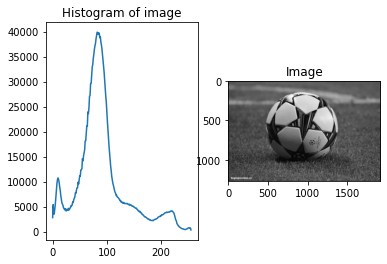

In [ ]:
img=plt.imread('bong.jpg')
img=np.array(Image.open('bong.jpg').convert('L'))
hist=np.histogram(img.flatten(), bins=256, range=[0,255])
plt.subplot(1,2,1)
plt.plot(hist[0])
plt.title('Histogram of image')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')
plt.title('Image')

Chọn ảnh để cân bằng

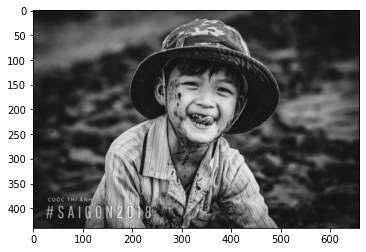

In [ ]:
img=np.array(Image.open('1.jpg').convert('L'))
plt.imshow(img,cmap='gray')

Histogram Equalization

In [ ]:
def histeq(im, nbr_bins = 256):
    """
    Histogram equalization of a grayscale image.
    """
    # get image histogram
    imhist, bins = np.histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum() # Cumulative distribution fucntion (Ham phan phoi tich luy)
    cdf = 255*cdf/cdf[-1] # normalize
    
    # use linear interpolation of cdf to find new pixel values
    # (Noi suy tuyen tinh)
    im2 = np.interp(im.flatten(), bins[:-1], cdf)
    
    return (im2.reshape(im.shape), cdf)

In [ ]:
hist_eq, trans = histeq(img)
hist_eq = np.round(hist_eq).astype(np.int64)

<ipython-input-10-6227b929385b>:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist, bins = np.histogram(im.flatten(), nbr_bins, normed=True)


Text(0.5, 1.0, 'Before')

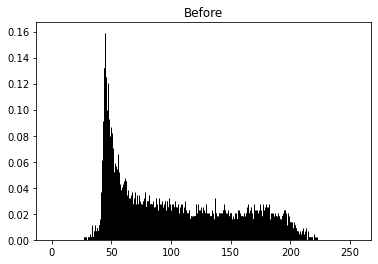

In [ ]:
plt.hist(img, np.arange(256), edgecolor = 'black', density = True)
plt.title('Before')

Text(0.5, 1.0, 'tranfer function')

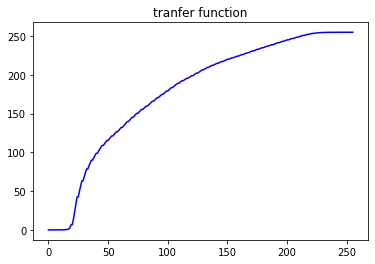

In [ ]:
plt.plot(trans, 'b-')
plt.title('tranfer function')

Text(0.5, 1.0, 'After')

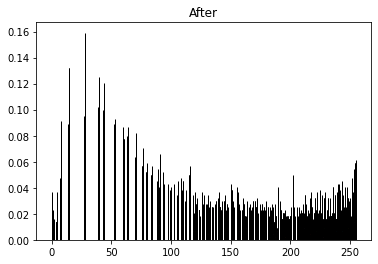

In [ ]:
plt.hist(hist_eq, np.arange(256), edgecolor = 'black', density = True)
plt.title('After')

(-0.5, 659.5, 439.5, -0.5)

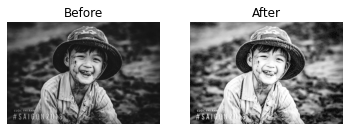

In [ ]:
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Before')
plt.axis('off')
plt.subplot(122)
plt.imshow(hist_eq,cmap='gray')
plt.title('After')
plt.axis('off')

Dùng OpenCV

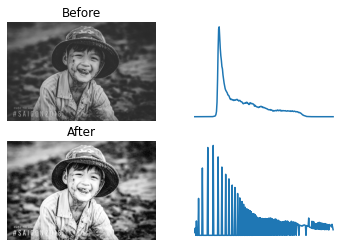

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('1.jpg',0)
hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
img_2 = cv2.equalizeHist(img)
hist2 = cv2.calcHist([img_2],[0],None,[256],[0,256])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)
plt.subplot(221),plt.imshow(img),plt.title('Before'),plt.axis('off');
plt.subplot(222),plt.plot(hist1),plt.axis('off');
plt.subplot(223),plt.imshow(img_2),plt.title('After'),plt.axis('off');
plt.subplot(224),plt.plot(hist2),plt.axis('off');

### Spatial Filtering

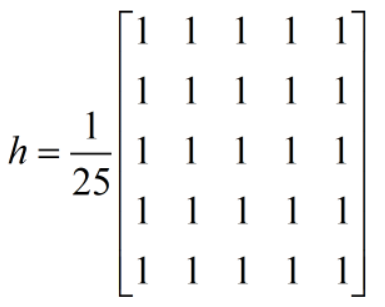

0


(-0.5, 659.5, 439.5, -0.5)

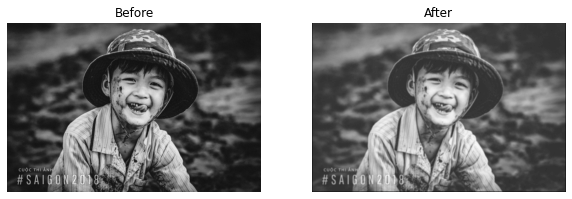

In [ ]:
img=np.array(Image.open('1.jpg').convert('L'))
m,n=img.shape
mask=np.ones([5,5],dtype=int)
mask=mask/25
img_new=np.zeros_like(img)
print(img_new[0,0])
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        img_new[i,j]=temp
plt.figure(figsize = (10,15))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Before')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_new,cmap='gray')
plt.title('After')
plt.axis('off')

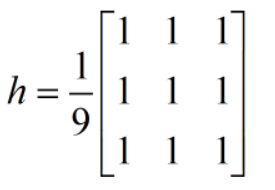

0


(-0.5, 659.5, 439.5, -0.5)

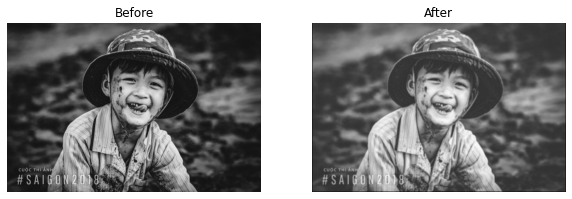

In [4]:
img=np.array(Image.open('1.jpg').convert('L'))
m,n=img.shape
mask=np.ones([3,3],dtype=int)
mask=mask/9
img_new=np.zeros_like(img)
print(img_new[0,0])
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        img_new[i,j]=temp
plt.figure(figsize = (10,15))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Before')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_new,cmap='gray')
plt.title('After')
plt.axis('off')

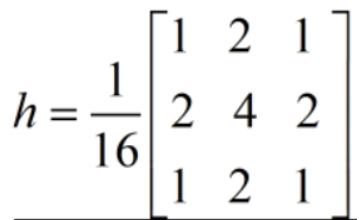

0


(-0.5, 659.5, 439.5, -0.5)

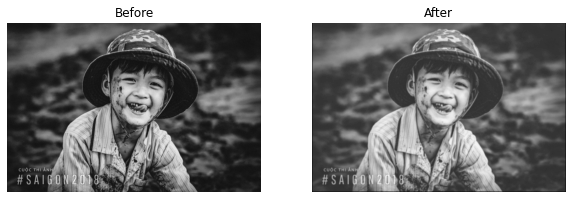

In [ ]:
img=np.array(Image.open('1.jpg').convert('L'))
m,n=img.shape
mask=np.array([[1,2,1],[2,4,2],[1,2,1]])
mask=mask/16
img_new=np.zeros_like(img)
print(img_new[0,0])
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        img_new[i,j]=temp
plt.figure(figsize = (10,15))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Before')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_new,cmap='gray')
plt.title('After')
plt.axis('off')

Cách khác:

In [3]:
def conv2d_11(A, W, b = 0, stride = 1, pad = 0):
    """
    A: input, A.shape = (n_H_old, n_W_old)
    W: fillter, W.shape = (f, f)
    """
    n_H_old, n_W_old = A.shape
    f, f = W.shape
    A_pad = np.pad(A, pad_width = pad, mode = 'constant', constant_values = 0)
    # new shape
    n_H_new = int((n_H_old - f + 2*pad)/stride) + 1
    n_W_new = int((n_W_old - f + 2*pad)/stride) + 1
    # result
    A_res = np.zeros((n_H_new, n_W_new))
    # compute
    for h in range(n_H_new):
        for v in range(n_W_new):
            h_start = h*stride
            h_end = h_start + f
            v_start = v*stride
            v_end = v_start + f
            A_res[h, v] = np.sum(A_pad[h_start:h_end, v_start:v_end] * W) + b
    return A_res

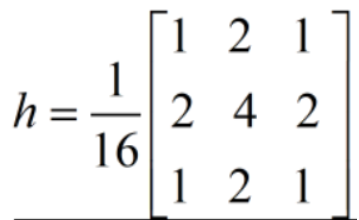

(-0.5, 657.5, 437.5, -0.5)

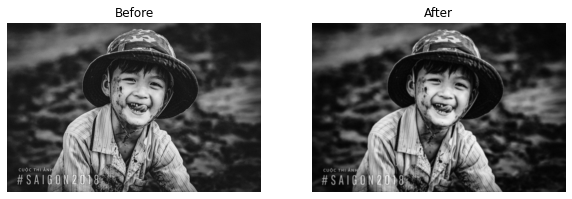

In [6]:
f=3
w=1./16 *np.array([[1,2,1],[2,4,2],[1,2,1]])
img_new=conv2d_11(img,w)
plt.figure(figsize = (10,15))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Before')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_new,cmap='gray')
plt.title('After')
plt.axis('off')

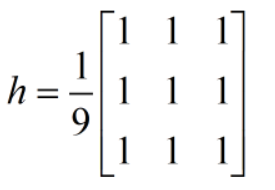

(-0.5, 657.5, 437.5, -0.5)

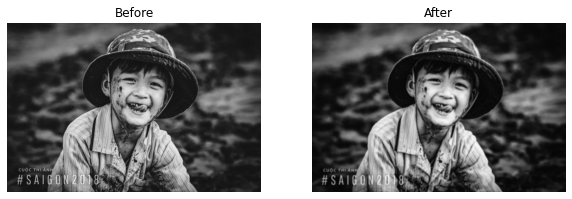

In [7]:
f=3
w=1./9*np.ones((f,f))
img_new=conv2d_11(img,w)
plt.figure(figsize = (10,15))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Before')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_new,cmap='gray')
plt.title('After')
plt.axis('off')

### Smoothing spatial filters

In [8]:
def multivariate_normal(x, y, sigmoid = 1):
    return 1/(2*np.pi*sigmoid**2)*np.exp(-(x**2+y**2)/(2*sigmoid**2))

In [15]:
n=15
range_ = np.arange(-n, n+1)
xx = range_
yy = range_
print(xx)
print(yy)
XX, YY = np.meshgrid(xx, yy)
print(XX)
print(YY)

[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15]
[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15]
[[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
    3   4   5   6   7   8   9  10  11  12  13  14  15]
 [-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
    3   4   5   6   7   8   9  10  11  12  13  14  15]
 [-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
    3   4   5   6   7   8   9  10  11  12  13  14  15]
 [-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
    3   4   5   6   7   8   9  10  11  12  13  14  15]
 [-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
    3   4   5   6   7   8   9  10  11  12  13  14  15]
 [-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
    3   4   5   6   7   8  

(-0.5, 629.5, 409.5, -0.5)

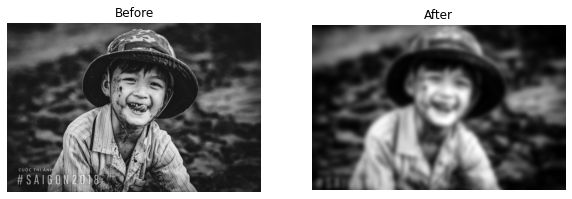

In [16]:
f=3
w=multivariate_normal(XX, YY, sigmoid = 5)
img_new=conv2d_11(img,w)
plt.figure(figsize = (10,15))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Before')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_new,cmap='gray')
plt.title('After')
plt.axis('off')

In [17]:
def add_noise(im, impulse = False, gauss = False):
    """
    Imput: Grayscale.
    Return: Noised Grayscale
    im: grayscale!
    Defult: Salt and Pepper Noise.
    """
    im_ = im.copy()
    h, w = im.shape
    if gauss == True:
        return im_ + np.random.randn(h, w)*np.random.randint(20,50)
    number_of_pixels = np.random.randint(im.size//5, im.size//3)
    for i in range(number_of_pixels):
        y_coor = np.random.randint(0, w-1)
        x_coor = np.random.randint(0, h-1)
        im_[x_coor, y_coor] = 255
    if impulse == False:
        number_of_pixels = np.random.randint(im.size//5, im.size//3)
        for i in range(number_of_pixels):
            y_coor = np.random.randint(0, w-1)
            x_coor = np.random.randint(0, h-1)
            im_[x_coor, y_coor] = 0
    
    return im_ 

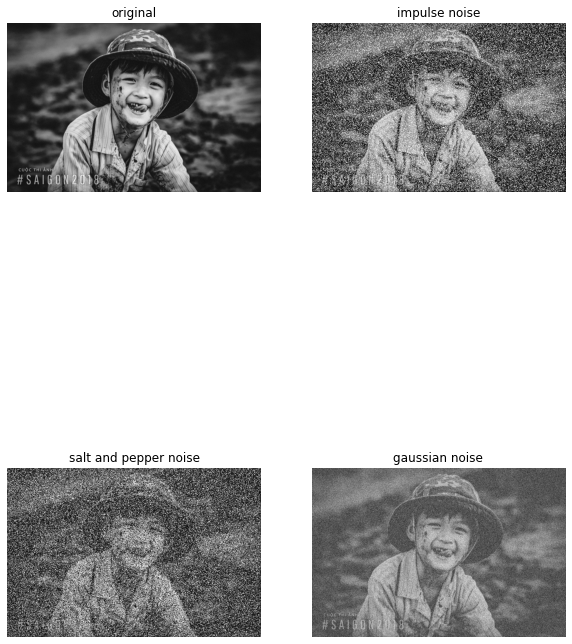

In [18]:
gray = np.array(Image.open('1.jpg').convert('L'))
gray_impulse = add_noise(gray, impulse = True)
gray_salt_pepper = add_noise(gray)
gray_gauss = add_noise(gray, gauss = True)

gray_list = [gray, gray_impulse, gray_salt_pepper, gray_gauss]
mapping = {0:'original', 1:'impulse noise', 2:'salt and pepper noise', 3:'gaussian noise'}

fig = plt.figure(figsize = (10,15))
for i in range(len(gray_list)):
    ax = fig.add_subplot(2,2,i+1)
    ax.axis('off')
    ax.set_title(mapping[i])
    ax.imshow(gray_list[i], cmap = 'gray')

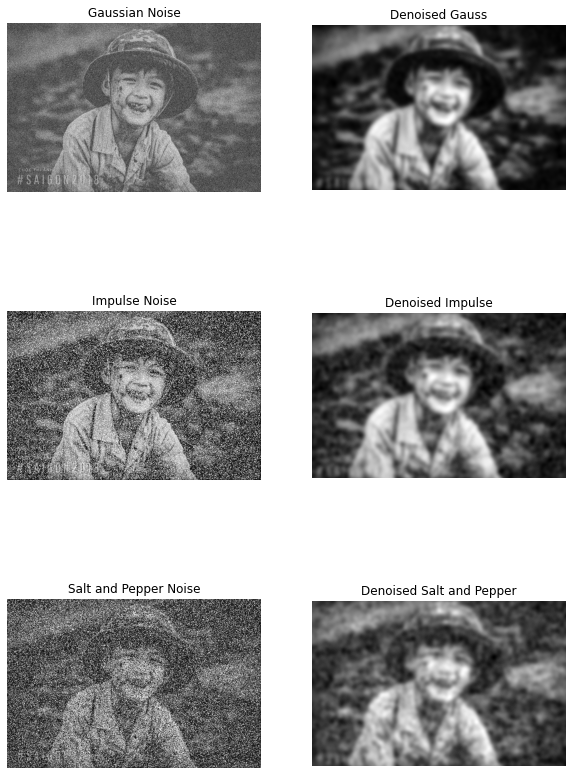

In [21]:
denoised_gauss1 = conv2d_11(gray_gauss, w)
denoised_impulse1 = conv2d_11(gray_impulse, w)
denoised_salt_pepper1 = conv2d_11(gray_salt_pepper, w)

gray_list1 = [denoised_gauss1, denoised_impulse1, denoised_salt_pepper1]
gray_list2 = [gray_gauss, gray_impulse, gray_salt_pepper]

mapping1 = {0:'Denoised Gauss', 1:'Denoised Impulse', 2:'Denoised Salt and Pepper'}
mapping2 = {0:'Gaussian Noise', 1:'Impulse Noise', 2: 'Salt and Pepper Noise'}

fig, ax = plt.subplots(3, 2, figsize = (10,15))
for i in range(len(gray_list1)):
    ax[i, 0].axis('off')
    ax[i, 0].set_title(mapping2[i])
    ax[i, 0].imshow(gray_list2[i], cmap = 'gray')
    ax[i, 1].axis('off')
    ax[i, 1].set_title(mapping1[i])
    ax[i, 1].imshow(gray_list1[i], cmap = 'gray')

Alternative solution: Median filters

In [22]:
import statistics
def medianblur(A, W_size = (3, 3), b = 0, stride = 1, pad = 0 ):
    n_H_old, n_W_old = A.shape
    f, f = W_size
    A_pad = np.pad(A, pad_width=pad, mode = 'constant', constant_values = 0)
    # new shape 
    n_H_new = int((n_H_old - f + 2*pad)/stride) + 1 
    n_W_new = int((n_W_old - f + 2*pad)/stride) + 1 
    # result
    A_res = np.zeros((n_H_new, n_W_new))
    # compute 
    for h in range(n_H_new):
        for v in range(n_W_new):
            h_start = h*stride 
            h_end = h_start + f
            v_start = v*stride 
            v_end = v_start + f
            A_res[h, v] = statistics.median(np.sort(A_pad[h_start:h_end, v_start:v_end].flatten())) + b 
    return A_res

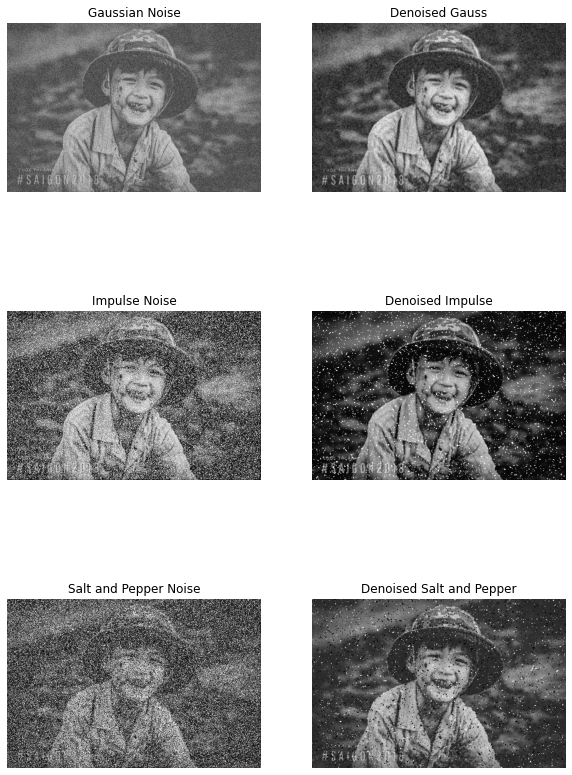

In [25]:
denoised_gauss2 = medianblur(gray_gauss)
denoised_impulse2 = medianblur(gray_impulse)
denoised_salt_pepper2 = medianblur(gray_salt_pepper)

gray_list_1 = [denoised_gauss2, denoised_impulse2, denoised_salt_pepper2]
gray_list_2 = [gray_gauss, gray_impulse, gray_salt_pepper]

mapping_1 = {0:'Denoised Gauss', 1:'Denoised Impulse', 2:'Denoised Salt and Pepper'}
mapping_2 = {0:'Gaussian Noise', 1:'Impulse Noise', 2: 'Salt and Pepper Noise'}

fig, ax = plt.subplots(3, 2, figsize = (10,15))
for i in range(len(gray_list_1)):
    ax[i, 0].axis('off')
    ax[i, 0].set_title(mapping_2[i])
    ax[i, 0].imshow(gray_list_2[i], cmap = 'gray')
    ax[i, 1].axis('off')
    ax[i, 1].set_title(mapping_1[i])
    ax[i, 1].imshow(gray_list_1[i], cmap = 'gray')

### Sharpening spatial filters

(-0.5, 1197.5, 625.5, -0.5)

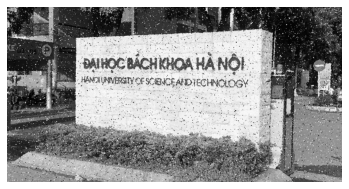

In [26]:
from PIL import Image
img=np.array(Image.open('hust.png').convert('L'))
img_salt_pepper = add_noise(img)
denoised_img_salt_pepper = medianblur(img_salt_pepper)
plt.imshow(denoised_img_salt_pepper, cmap='gray')
plt.axis('off')

In [27]:
w_laplacian=np.array([[0,1,0],[1,-4,1],[0,1,0]])
w_laplacian_diag=np.array([[1,1,1],[1,-8,1],[1,1,1]])

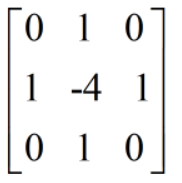

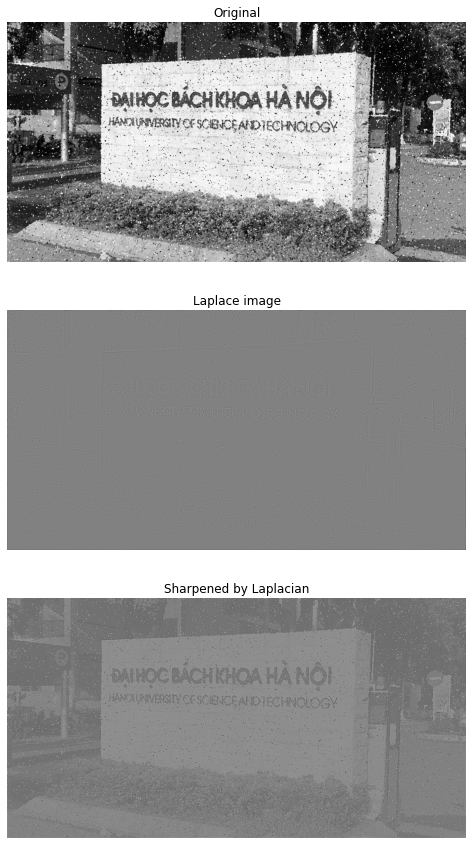

In [40]:
laplace_image = conv2d_11(denoised_img_salt_pepper, w_laplacian, pad=1)
sharpen_image = denoised_img_salt_pepper - 0.8*laplace_image

gray_list_1_1=[denoised_img_salt_pepper, laplace_image, sharpen_image]
mapping_1_1={0:'Original', 1:'Laplace image', 2:'Sharpened by Laplacian'}
fig, ax = plt.subplots(3, 1, figsize = (10,15))
ax=ax.flatten()
for i in range(3):
    ax[i].axis('off')
    ax[i].imshow(gray_list_1_1[i], cmap = 'gray')
    ax[i].set_title(mapping_1_1[i])

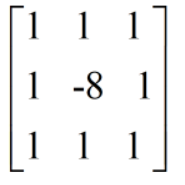

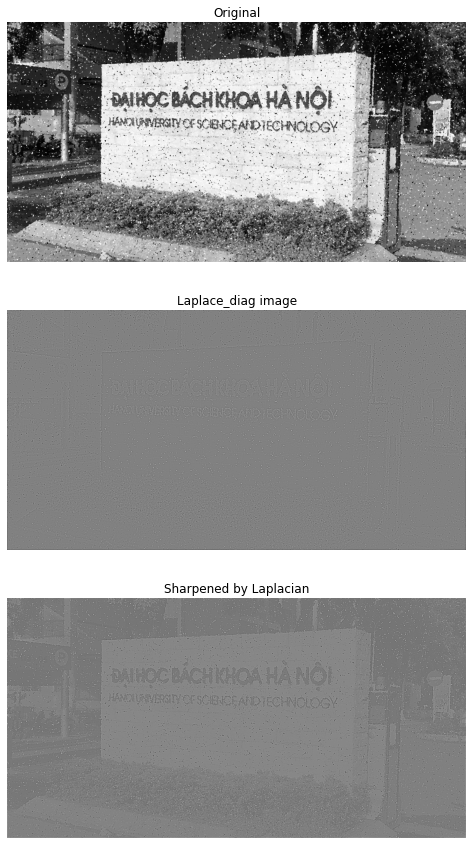

In [41]:
laplace_image = conv2d_11(denoised_img_salt_pepper, w_laplacian_diag, pad=1)
sharpen_image = denoised_img_salt_pepper - 0.8*laplace_image

gray_list_1_2=[denoised_img_salt_pepper, laplace_image, sharpen_image]
mapping_1_2={0:'Original', 1:'Laplace_diag image', 2:'Sharpened by Laplacian'}
fig, ax = plt.subplots(3, 1, figsize = (10,15))
ax=ax.flatten()
for i in range(3):
    ax[i].axis('off')
    ax[i].imshow(gray_list_1_2[i], cmap = 'gray')
    ax[i].set_title(mapping_1_2[i])

End.